<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Pr%C3%A1ctica_25_Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**


*   Declarar las bibliotecas necesarias para este proyecto
*   Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset



In [2]:

# ==============================================================================
# LIBRERÍAS
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

# ==============================================================================
# CARGAR ARCHIVO
# ==============================================================================

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/TCGA_InfoWithGrade.csv')

df.head(10)


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,33.21,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,35.19,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,44.65,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,33.96,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,87.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **2. Análisis exploratorio de datos (EDA)**



  *   Describir forma y estructura (shape, describe(), info())
  *   Mostrar la distribución de clases (y.value.counts())
  *   Visualizar
      - Histograma de al menos 3 variables numéricas
      - Boxplots o violin plots por clase si es computacionalmente viable
      - Mapa de calor de correlaciones entre variables

Reflexiona:

  *   ¿Existen clases desbalanceadas?
          - Si, hay desbalance:
            Clase 0: 487 muestras (≈ 58.04%)
            Clase 1: 352 muestras (≈ 41.95%)

            Aunque no es un desbalance extremo, sí existe una diferencia muy notable.

  *   ¿Qué atributos parecen más informativos?
          - Con base en la matriz de correlación con la variable 'Grade':
              IDH1: -0.71 > Fuerte correlación negativa
              Age_at_diagnosis: 0.53 > Fuerte correlación positiva
              PTEN: 0.37 > Correlación positiva moderada
              ATRX: -0.31 > Correlación negativa moderada

            Las variables que parecen más informativas con respecto a la variable 'Grade' son las mencionadas previamente, ya que estas presentan las correlaciones más significativas tanto positivas como negativas. En especial, IDH1 tiene una correlación negativa muy fuerte con 'Grade'.








Forma del Dataset: (839, 24)
--------------------------------------------------------------------------------

Descripción Estadística:



,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


,Column,Non-Null Count,Dtype
0,Grade,839,int64
1,Gender,839,int64
2,Age_at_diagnosis,839,float64
3,Race,839,int64
4,IDH1,839,int64
5,TP53,839,int64
6,ATRX,839,int64
7,PTEN,839,int64
8,EGFR,839,int64
9,CIC,839,int64


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Distribución de clases:



,count
Grade,
0,487
1,352


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 Histogramas de variables numéricas:



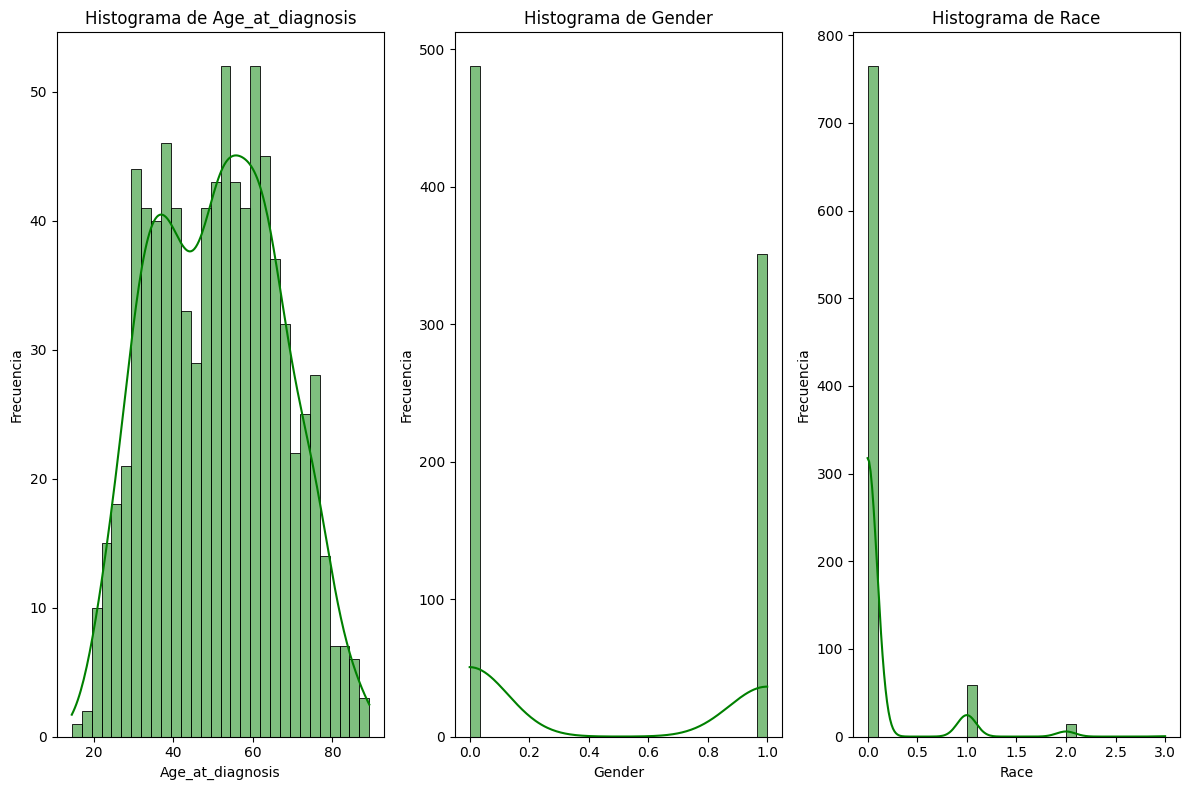

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 Boxplots y Violin plots por clase:



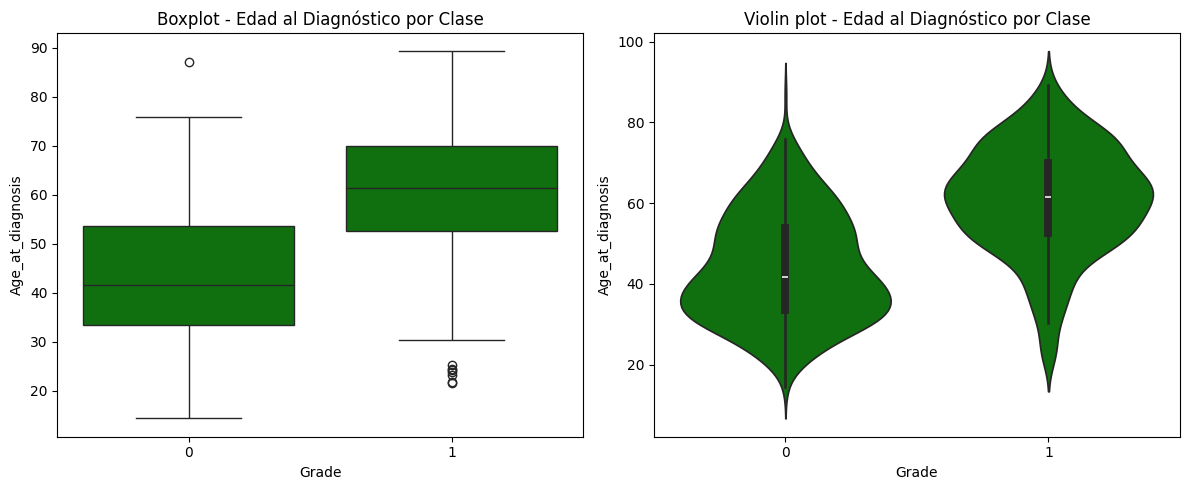

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 Mapa de Calor de Correlaciones:



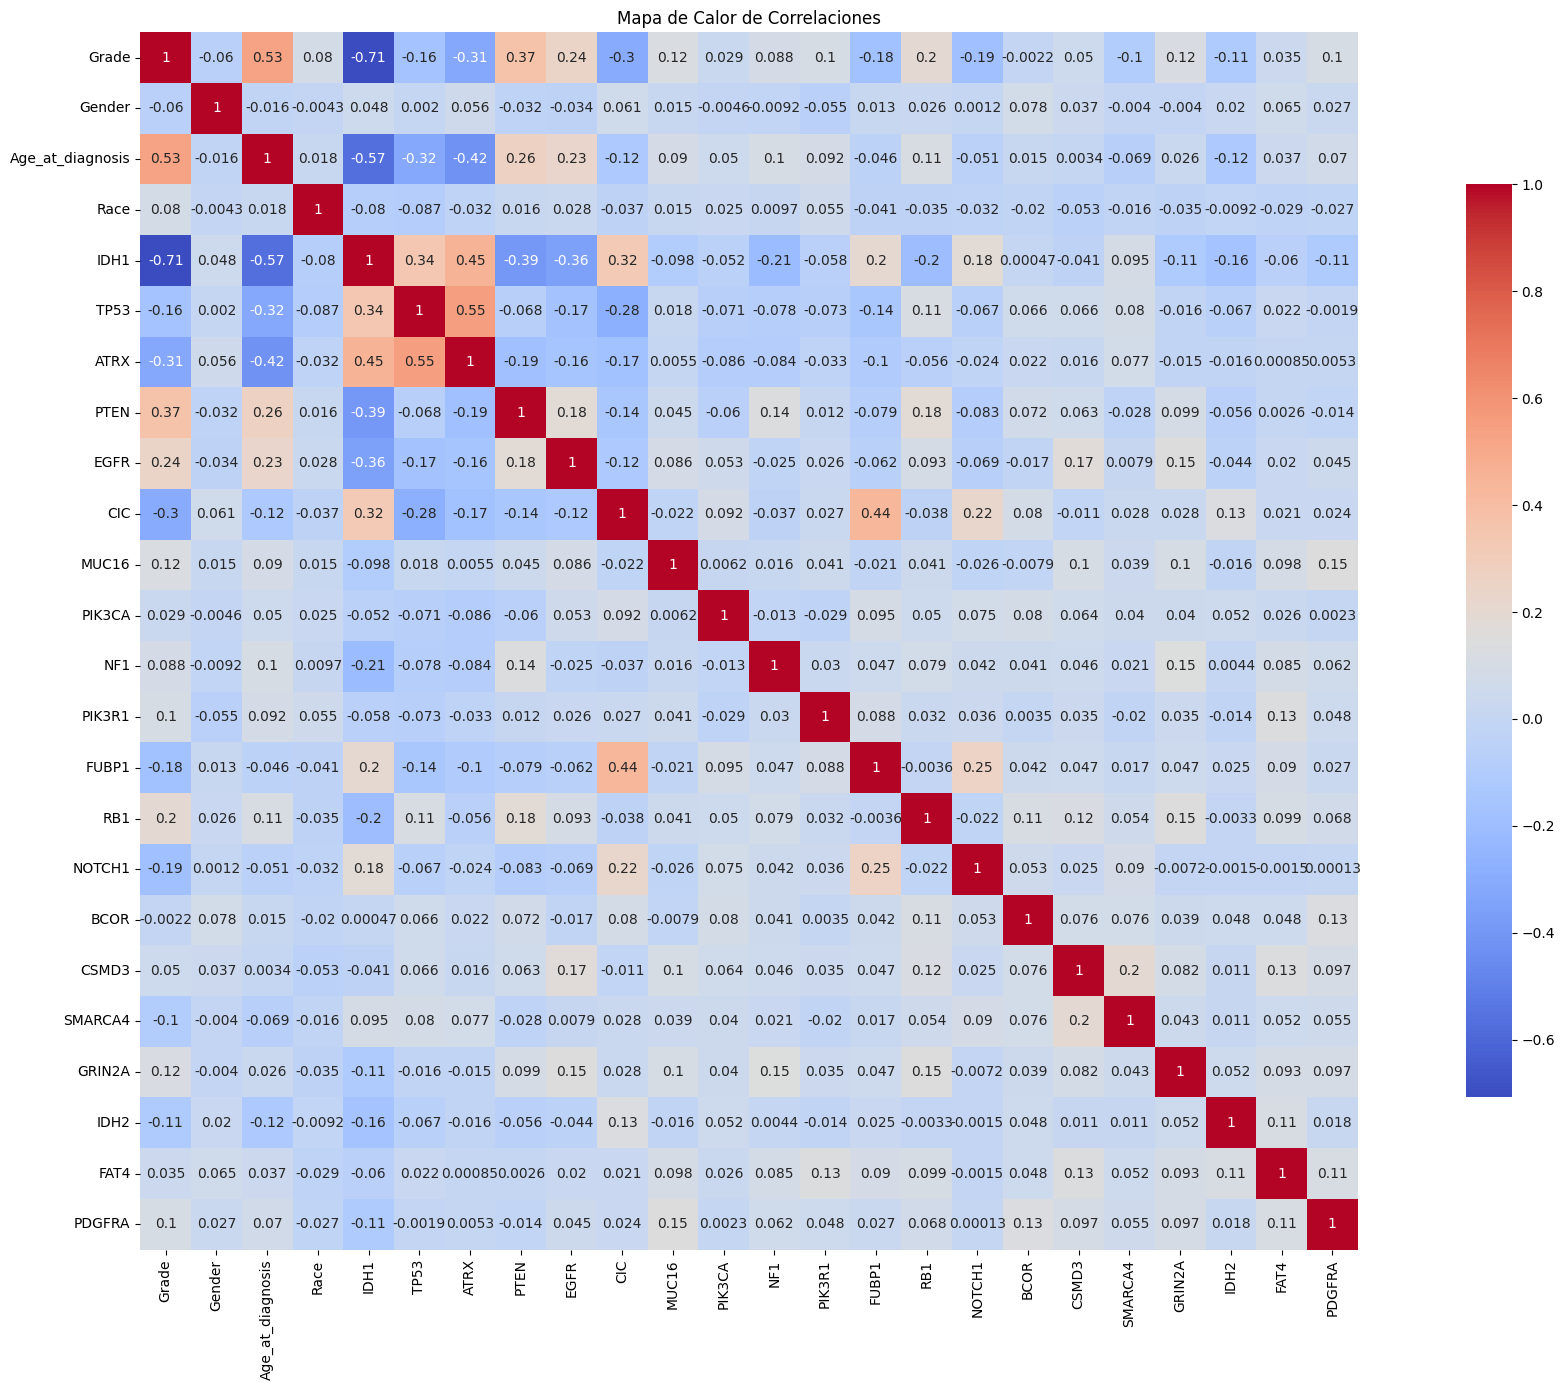

--------------------------------------------------------------------------------


In [12]:
# ==============================================================================
# Análisis exploratorio de datos (EDA)
# ==============================================================================

print('Forma del Dataset:', df.shape)

print('-' * 80)

print('\nDescripción Estadística:\n')
display(df.describe())

print('-' * 80)

print('-' * 80)

info_table = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum().values,
    'Dtype': df.dtypes.values
})

display(info_table.style.set_caption("Información del Dataset:"))

print('-' * 80)

print('-' * 80)

print('\nDistribución de clases:\n')
display(df['Grade'].value_counts())

print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: HISTORGRAMAS DE 3 VARIABLES NUMÉRICAS
# ==============================================================================

num_vars = ['Age_at_diagnosis', 'Gender', 'Race']

plt.figure(figsize = (12, 8))

for i, var in enumerate(num_vars):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data = df, x = var, kde = True, bins = 30, color = 'green')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

print('-' * 80)
print('\n Histogramas de variables numéricas:\n')

plt.tight_layout()
plt.show()

print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: BOXPLOT Y VIOLIN PLOT
# ==============================================================================

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'Grade', y = 'Age_at_diagnosis', color = 'green')
plt.title('Boxplot - Edad al Diagnóstico por Clase')

plt.subplot(1, 2, 2)
sns.violinplot(data = df, x = 'Grade', y = 'Age_at_diagnosis', color = 'green')
plt.title('Violin plot - Edad al Diagnóstico por Clase')

print('-' * 80)
print('\n Boxplots y Violin plots por clase:\n')

plt.tight_layout()
plt.show()

print('-' * 80)

# ==============================================================================
# VISUALIZACIÓN: MAPA DE CORRELACIÓN ENTRE VARIABLES
# ==============================================================================

plt.figure(figsize = (22, 14))
matriz_correlacion = df.corr()

sns.heatmap(matriz_correlacion, annot = True, cmap = 'coolwarm', square = True, cbar_kws = {'shrink': .75})
plt.title('Mapa de Calor de Correlaciones')

print('-' * 80)
print('\n Mapa de Calor de Correlaciones:\n')

plt.tight_layout()
plt.show()

print('-' * 80)










# **3. Gráfica de Errores en Entretenimiento y Prueba**


*   En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidades. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K = 10
*   Los valores de las profundidades a evaluar son 2, 5, 10, 15, 20, 25, 30 y none
*   Deberás usar StratifiedKFold con 10 particiones, y un valor aleatorio de 3
*   Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
*   Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring = "f1_macro", y el StratifiedKFold, con un valor aleatorio = 7
*   Muestra una gráfica para los distintos resultados cuando se usa F1 Macro



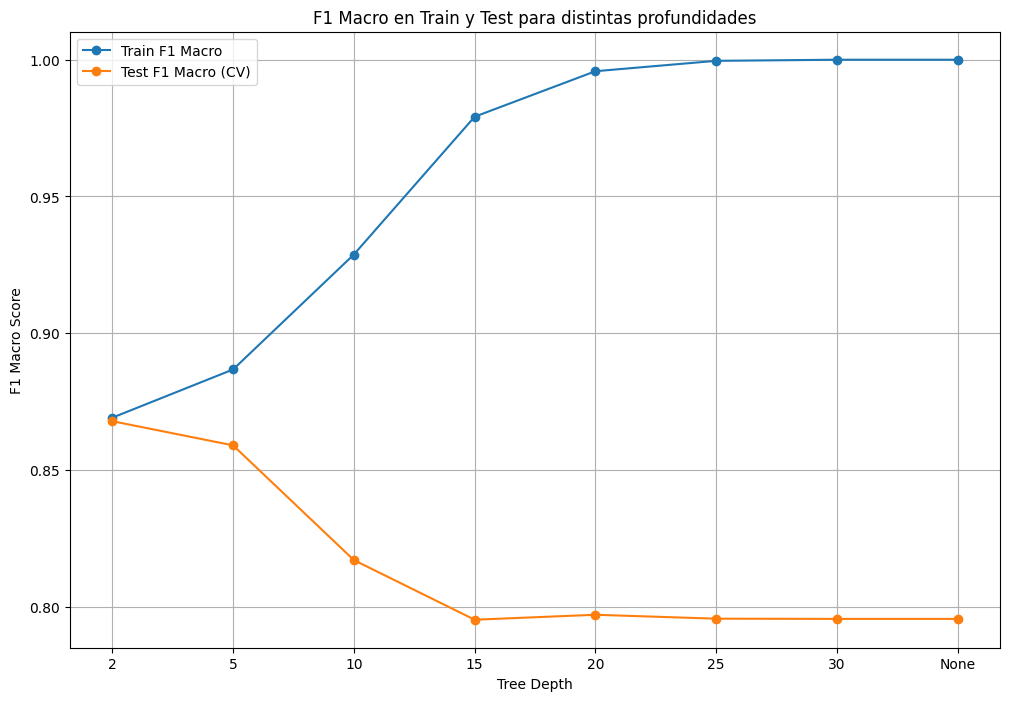

In [17]:
X = df.drop('Grade', axis = 1)
y = df['Grade']

depths = [2, 5, 10, 15, 20, 25, 30, None]

train_scores = []
test_scores = []

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth, random_state = 3)
    test_score = cross_val_score(model, X, y, cv = cv, scoring = 'f1_macro').mean()
    test_scores.append(test_score)

    train_f1s = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        f1_train = f1_score(y_train, y_pred_train, average = 'macro')
        train_f1s.append(f1_train)

    train_scores.append(np.mean(train_f1s))

plt.figure(figsize=(12, 8))

depth_labels = [str(d) if d is not None else 'None' for d in depths]
plt.plot(depth_labels, train_scores, label = 'Train F1 Macro', marker = 'o')
plt.plot(depth_labels, test_scores, label = 'Test F1 Macro (CV)', marker = 'o')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Macro Score')
plt.title('F1 Macro en Train y Test para distintas profundidades')
plt.legend()
plt.grid(True)
plt.show()

# **4. Optimización de hiperparámetros con RandomizedSearchCV**


*   Define el espacio de búsqueda aleatorio para los siguientes hiperparámetros:
      
      - Criterion = gini, entropy
      - max_depth: de 5 a 50 con incrementos de 1
      - min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKFold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   n_iter = 5 (combinaciones aleatorias a buscar)
*   n_jobs = -1 para acelerar cómputo
*   Métrica de evaluación: f1 Macro
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score









In [21]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 51, 1)),
    'min_samples_split': list(range(2, 21, 1))
}

dt = DecisionTreeClassifier(random_state = 3)
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

random_search = RandomizedSearchCV(estimator = dt, param_distributions = param_dist, n_iter = 5, scoring = 'f1_macro', n_jobs = -1, cv = cv, random_state = 3)

random_search.fit(X, y)

print('-' * 80)

print('\nMejores hiperparámetros encontrados:\n')
print(random_search.best_params_)

print('-' * 80)

print('-' * 80)

print('\nMejor score obtenido:\n')
print(random_search.best_score_)

print('-' * 80)


--------------------------------------------------------------------------------

Mejores hiperparámetros encontrados:

{'min_samples_split': 17, 'max_depth': 35, 'criterion': 'entropy'}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Mejor score obtenido:

0.8339551781936171
--------------------------------------------------------------------------------


# **5. Optimización de hiperparámetros con GridSearchCV**

*   Define el espacio de búsqueda para los siguientes hiperparámetros:
      
      - Criterion = gini, entropy
      - max_depth: de 5 a 50 con incrementos de 1
      - min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKFold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   Métrica de evaluación: f1 Macro
*   n_jobs = -1 para acelerar cómputo
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 51, 1)),
    'min_samples_split': list(range(2, 21, 1))

}


clf = DecisionTreeClassifier(random_state = 3)

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'f1_macro', cv = cv, n_jobs = -1, verbose = 1)

grid_search.fit(X, y)

print('-' * 80)

print('\nMejores hiperparámetros encontrados:\n')
print(grid_search.best_params_)

print('-' * 80)

print('-' * 80)

print('\nMejor score obtenido:\n')
print(grid_search.best_score_)

print('-' * 80)


Fitting 10 folds for each of 1748 candidates, totalling 17480 fits
--------------------------------------------------------------------------------

Mejores hiperparámetros encontrados:

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Mejor score obtenido:

0.8640567252873577
--------------------------------------------------------------------------------


# **6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy**

*   Define el espacio de búsqueda aleatorio para los siguientes hiperparámetros:
      
      - Criterion = gini, entropy
      - max_depth: de 5 a 50 con incrementos de 1
      - min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKFold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   n_iter = 5 (combinaciones aleatorias a buscar)
*   n_jobs = -1 para acelerar cómputo
*   Métrica de evaluación: accuracy
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score

In [24]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 51, 1)),
    'min_samples_split': list(range(2, 21, 1))
}

model = DecisionTreeClassifier(random_state = 3)

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)

random_search = RandomizedSearchCV(model, param_distributions = param_dist, n_iter = 5, cv = cv, scoring = 'accuracy', n_jobs = -1, random_state = 3)

random_search.fit(X, y)

print('-' * 80)

print('\nMejores hiperparámetros encontrados:\n')
print(random_search.best_params_)

print('-' * 80)

print('-' * 80)

print('\nMejor score obtenido:\n')
print(random_search.best_score_)

print('-' * 80)


--------------------------------------------------------------------------------

Mejores hiperparámetros encontrados:

{'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Mejor score obtenido:

0.8616896156052782
--------------------------------------------------------------------------------


# **7. Optimización de hiperparámetros con GridSearchCV: accuracy**

*   Define el espacio de búsqueda para los siguientes hiperparámetros:
      
      - Criterion = gini, entropy
      - max_depth: de 5 a 50 con incrementos de 1
      - min_samples_split: de 2 a 20 con incrementos de 1

*   Usa el árbol de decisión
*   StratifiedKFold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
*   Métrica de evaluación: accuracy
*   n_jobs = -1 para acelerar cómputo
*   Imprime los mejores hiperparámetros encontrados
*   Imprime el best_score

In [25]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 51, 1)),
    'min_samples_split': list(range(2, 21, 1))
}

model = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', n_jobs = -1)

grid_search.fit(X, y)

print('-' * 80)

print('\nMejores hiperparámetros encontrados:\n')
print(grid_search.best_params_)

print('-' * 80)

print('-' * 80)

print('\nMejor score obtenido:\n')
print(grid_search.best_score_)

print('-' * 80)


--------------------------------------------------------------------------------

Mejores hiperparámetros encontrados:

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Mejor score obtenido:

0.8689193042486456
--------------------------------------------------------------------------------


# **8. Actividad de reflexión y análisis**

**¿Cuál método encontró mejores hiperparámetros?**

        - Mejor score (f1_macro): GridSearchCV con f1_macro obtuvo el mejor resultado con un score de aproximadamente 0.8640
        - Mejor score (accuracy): GridSearchCV con accuracy obtuvo el mejor resultado con un score de aproximadamente 0.8689

        El mejor score en general se encontró usando GridSearchCV con accuracy.

**¿Cuál fue más costoso computacionalmente?**

        - El método GridSearchCV fue más costoso computacionalmente, ya que prueba todas las combinaciones posibles en un espacio de búsqueda, en este caso fueron 1748 combinaciones resultando en 17480. Por otro lado, RandomizedSearchCV seleccionó aleatoriamente 5 combinaciones, por lo que resultó menos costoso computacionalmente.

 **¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?**

        - Los resultados de f1_macro fueron ligeramente diferente entre los dos métodos:
          RandomizedSearchCV (f1_macro): 0.8339
          GridSearchCV (f1_macro): 0.8640
        - La razón de la diferencia es que en GridSearchCV evalúa todas las combinaciones posibles, lo que es más probable encontrar la combinación óptima de hiperparámetros para maximixar el f1_macro, mientras que RandomizedSearchCV explora un número limitado de combinaciones y de manera aleatoria.

**¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?**

        - Los resultados de accuracy también fueron diferentes:
          RandomizedSearchCV (accuracy): 0.8616
          GridSearchCV (accuracy):0.8689
        - De la misma forma que en la pregunta anterior, la diferencia se debe a que GridSearchCV evalúa todas las combinaciones posibles, mientras que RandomizedSearchCV evalúa solo un número limitado de combinaciones y lo hace de manera aleatoria.
        
**¿Los valores de hiperparámetros fueron iguales en Accuracy y f1 Macro?**

        - Los valores de los hiperparámetros para f1_macro y accuracy fueron distintos:
          RandomizedSearchCV (f1_macro): {'min_samples_split': 17, 'max_depth': 35, 'criterion': 'entropy'}
          RandomizedSearchCV (accuracy): {'min_samples_split': 20, 'max_depth': 9, 'criterion': 'entropy'}
          GridSearchCV (f1_macro): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}
          GridSearchCV (accuracy):{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
          





